In [2]:
from pathlib import Path
from dotenv import load_dotenv
import os
import numpy as np
import csv
import pandas as pd
os.chdir(os.environ.get("PROJECT_PATH"))
from mine_seg_sat import dataset
load_dotenv()

data_path = Path("prepared_dataset")
split = "test"

/var/folders/8t/jw61zz954rbcbps32kpn49l80000gn/T/ipykernel_53398/2473490594.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/Users/glenn_hyh/Documents/github/bc-wildfire-prediction/mine_seg_sat/dataset.py:449: RuntimeWarning: invalid value encountered in divide
  NDVI = (B08 - B04) / (B08 + B04)
/Users/glenn_hyh/Documents/github/bc-wildfire-prediction/mine_seg_sat/dataset.py:452: RuntimeWarning: invalid value encountered in divide
  NDBI = (B11 - B08) / (B11 + B08)
/Users/glenn_hyh/Documents/github/bc-wildfire-prediction/mine_seg_sat/dataset.py:455: RuntimeWarning: invalid value encountered in divide
  NDWI = (B08 - B12) / (B08 + B12)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


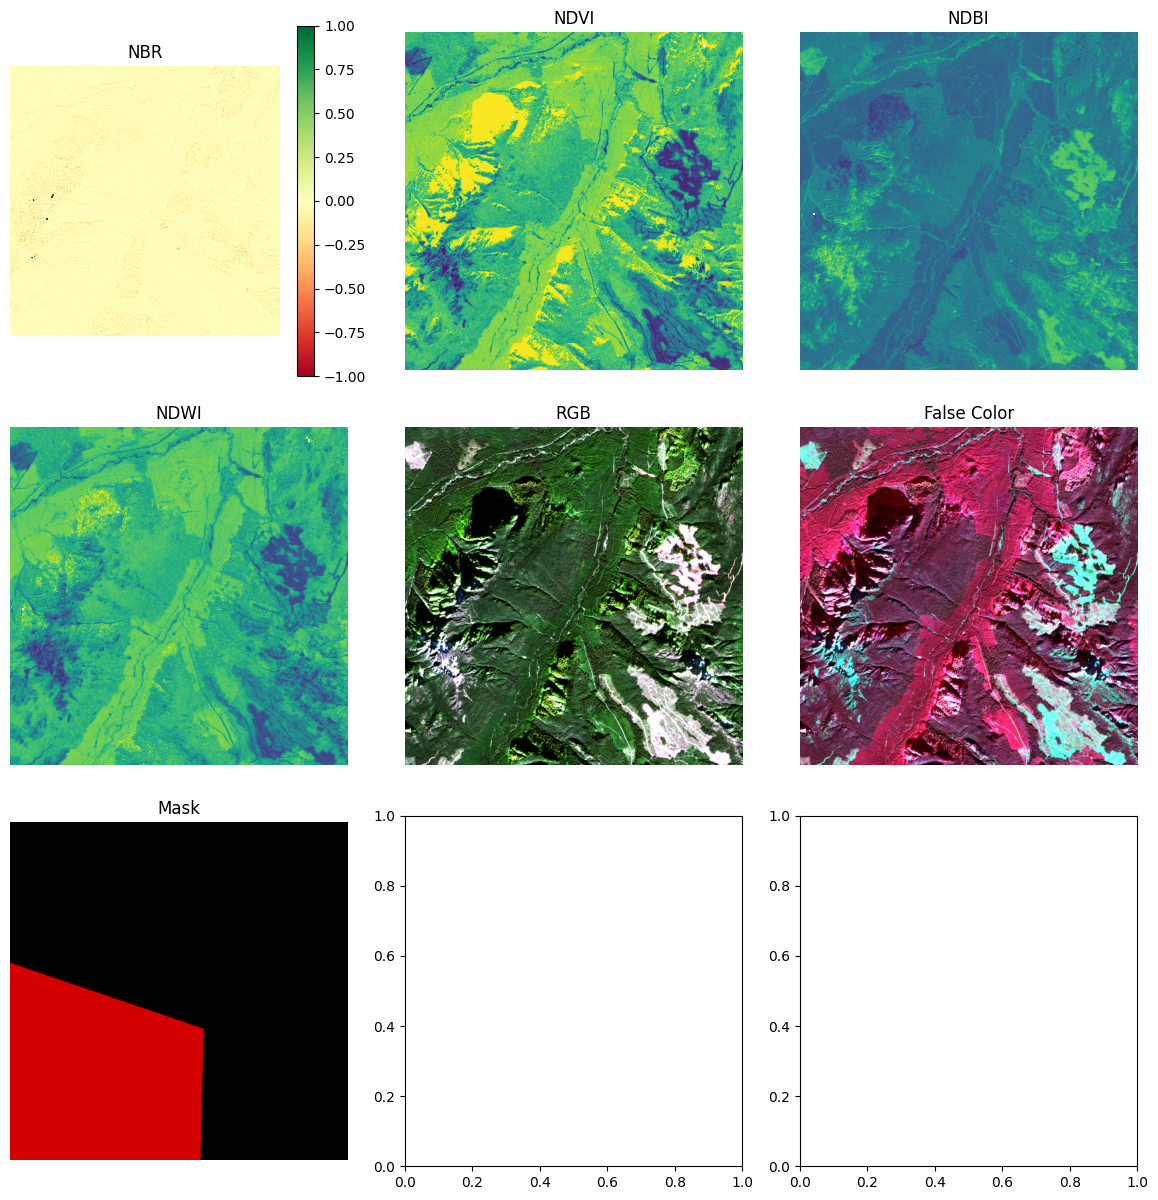

In [15]:

# Instantiate the dataset
forest_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)

index = 0

# Display the transformed images including NBR and NDVI
forest_sat_dataset.display_transformed_images(index)

In [3]:
def save_all_numerical_values_to_csv(dataset, csv_filename):
    # Open the CSV file to write into
    with open(csv_filename, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Write the header
        writer.writerow(['ID', 'NDVI', 'NBR', 'NDWI', 'RGB', 'Label'])

        # Loop through all the indices in the dataset
        for index in range(len(dataset)):
            numerical_values = dataset.get_numerical_values(index)
            if numerical_values:  # Check if the dictionary is not empty
                ndvi_list = numerical_values["NDVI"].flatten().tolist()
                nbr_list = numerical_values["NBR"].flatten().tolist()
                ndwi_list = numerical_values["NDWI"].flatten().tolist()
                rgb_list = numerical_values["RGB"].flatten().tolist()
                location = numerical_values["Location"].replace(
                    "image_directory_", "")

                # Convert the lists to string representations
                ndvi_str = "[" + ", ".join(map(str, ndvi_list)) + "]"
                nbr_str = "[" + ", ".join(map(str, nbr_list)) + "]"
                ndwi_str = "[" + ", ".join(map(str, ndwi_list)) + "]"
                rgb_str = "[" + ", ".join(map(str, rgb_list)) + "]"

                # Write the data to the CSV file
                # Leave the label column empty for manual labeling
                writer.writerow([location, ndvi_str, nbr_str, ndwi_str, rgb_str, ""])


In [3]:
numerical_values = forest_sat_dataset.get_numerical_values(index)
print(numerical_values)
# save_all_numerical_values_to_csv(
#     forest_sat_dataset, "./models/calculated_data.csv"


Filepath: image_directory_20220824_105
Location info: image_directory_20220824_105
{'NDVI': array([[ 0.03631019, -0.77415818, -0.79935999, ...,  0.06793215,
        -0.03423364,  0.08163946],
       [ 0.33844375, -0.25014911, -0.81309328, ...,  0.05459467,
         0.05581626,  0.05614418],
       [ 0.13983017,  0.0417951 , -0.85490353, ...,  0.03710805,
         0.01579155,  0.04217619],
       ...,
       [ 0.31184305, -0.08479382, -0.85949721, ..., -0.16124998,
         0.15489839,  0.17044225],
       [ 0.29063235, -0.00256776, -0.8595704 , ..., -0.35302821,
         0.09942865,  0.19628617],
       [ 0.20628342,  0.04883835, -0.83829343, ...,  0.08382629,
        -0.22701739,  0.11010206]]), 'NBR': array([[-0.02102035, -0.84964817, -0.63671214, ..., -0.0741865 ,
        -0.00534019,  0.13273888],
       [ 0.30468009, -0.35563255, -0.7015342 , ..., -0.05139029,
        -0.07905455, -0.08233466],
       [ 0.00817241,  0.02511548, -0.73836179, ...,  0.02397586,
        -0.02161089, -

## Organize data to labeled_data_path.csv

In [8]:
# open dataset_splits.csv from "../prepared_dataset" into a pandas dataframe
df_path = pd.read_csv(data_path / "dataset_splits.csv")

In [5]:
df_path.head()

,split,path_name_sentinel2,satellite,imagery_id,date,tile_id,saving_path,coordinates,if_fire,data_path,mask_path
0,train,../datasets/sentinel2/S2A_9UYR_20220801_0_L2A/...,sentinel2,S2A_9UYR_20220801_0_L2A,2022-08-01,3_2,../prepared_dataset/20220801/3_2,POLYGON ((-125.97607529975805 50.3057477994724...,True,image_directory_20220801_0,mask_directory_20220801_0
1,train,../datasets/sentinel2/S2A_9UYR_20220801_0_L2A/...,sentinel2,S2A_9UYR_20220801_0_L2A,2022-08-01,3_4,../prepared_dataset/20220801/3_4,POLYGON ((-125.7607154787941 50.29994118390697...,True,image_directory_20220801_1,mask_directory_20220801_1
2,train,../datasets/sentinel2/S2B_9UYR_20220809_0_L2A/...,sentinel2,S2B_9UYR_20220809_0_L2A,2022-08-09,12_6,../prepared_dataset/20220809/12_6,POLYGON ((-125.58963785229653 49.6731819674123...,True,image_directory_20220809_2,mask_directory_20220809_2
3,train,../datasets/sentinel2/S2A_9UYR_20220920_0_L2A/...,sentinel2,S2A_9UYR_20220920_0_L2A,2022-09-20,8_7,../prepared_dataset/20220920/8_7,POLYGON ((-125.46333176774317 49.9457832286288...,True,image_directory_20220920_3,mask_directory_20220920_3
4,train,../datasets/sentinel2/S2B_9UYQ_20220816_0_L2A/...,sentinel2,S2B_9UYQ_20220816_0_L2A,2022-08-16,2_6,../prepared_dataset/20220816/2_6,POLYGON ((-125.6041482479572 49.46469315711875...,True,image_directory_20220816_4,mask_directory_20220816_4


In [11]:
len(df_path)

221

In [7]:
# get split of the first row
df_path.iloc[0]['split']

'train'

In [9]:
# drop some columns
df_path = df_path.drop(columns=["path_name_sentinel2", "satellite", "imagery_id",
    "date", "tile_id", "saving_path", "coordinates"])

In [10]:
# Save the dataframe to a new csv file
df_path.to_csv("dataset_tables/dataset_splits.csv", index=False)

## Convert image data into numerical data saving to numerical_dataset.csv

In [16]:
save_all_numerical_values_to_csv(
    forest_sat_dataset, "dataset_tables/numerical_data.csv")

Filepath: image_directory_20220920_7
Location info: image_directory_20220920_7
Filepath: image_directory_20221117_8
Location info: image_directory_20221117_8
Filepath: image_directory_20220730_9
Location info: image_directory_20220730_9
Filepath: image_directory_20220817_137
Location info: image_directory_20220817_137
Filepath: image_directory_20221002_138


/Users/glenn_hyh/Documents/github/bc-wildfire-prediction/mine_seg_sat/dataset.py:251: RuntimeWarning: invalid value encountered in divide
  return band / np.percentile(band, percentile)


Location info: image_directory_20221002_138
Filepath: image_directory_20220808_139
Location info: image_directory_20220808_139
Filepath: image_directory_20220809_140
Location info: image_directory_20220809_140
Filepath: image_directory_20220920_141
Location info: image_directory_20220920_141
Filepath: image_directory_20220730_142
Location info: image_directory_20220730_142
Filepath: image_directory_20220920_143
Location info: image_directory_20220920_143
Filepath: image_directory_20220730_144
Location info: image_directory_20220730_144
Filepath: image_directory_20221002_145
Location info: image_directory_20221002_145
Filepath: image_directory_20221015_146
Location info: image_directory_20221015_146
Filepath: image_directory_20220801_147
Location info: image_directory_20220801_147
Filepath: image_directory_20220722_148
Location info: image_directory_20220722_148
Filepath: image_directory_20221015_149
Location info: image_directory_20221015_149
Filepath: image_directory_20220816_150
Loca

/Users/glenn_hyh/Documents/github/bc-wildfire-prediction/mine_seg_sat/dataset.py:609: RuntimeWarning: invalid value encountered in divide
  NDVI = (B08 - B04) / (B08 + B04)
/Users/glenn_hyh/Documents/github/bc-wildfire-prediction/mine_seg_sat/dataset.py:611: RuntimeWarning: invalid value encountered in divide
  NBR = (B08 - B07_upsampled) / (B08 + B07_upsampled)


Location info: image_directory_20220808_163
Filepath: image_directory_20220730_164
Location info: image_directory_20220730_164
Filepath: image_directory_20220714_165
Location info: image_directory_20220714_165
Filepath: image_directory_20220907_166
Location info: image_directory_20220907_166
Filepath: image_directory_20220816_167
Location info: image_directory_20220816_167
Filepath: image_directory_20220831_168
Location info: image_directory_20220831_168
Filepath: image_directory_20221015_169
Location info: image_directory_20221015_169
Filepath: image_directory_20221002_170
Location info: image_directory_20221002_170
Filepath: image_directory_20220808_171
Location info: image_directory_20220808_171
Filepath: image_directory_20220730_172
Location info: image_directory_20220730_172
Filepath: image_directory_20220722_173
Location info: image_directory_20220722_173
Filepath: image_directory_20220831_174
Location info: image_directory_20220831_174
Filepath: image_directory_20221015_175
Loca

In [3]:
num_df = pd.read_csv("dataset_tables/numerical_data.csv")

In [18]:
num_df.head()

,ID,split,NDVI,NBR,NDWI,RGB,Label
0,20220801_0,train,"[-0.12356214478431785, -0.24088930636702904, 0...","[-0.03425114915927098, -0.09652637774532737, -...","[0.18924738879964226, 0.2506837463154132, -0.0...","[0.7418210902451574, 0.848803292831117, 0.8327...",True
1,20220801_1,train,"[0.019184432943037146, 0.18289768639920112, 0....","[-0.0474355681703403, 0.017567887899074538, -0...","[0.029426130493481816, -0.029396542718740898, ...","[0.6762652022940326, 0.7453307955700746, 0.727...",True
2,20220809_2,train,"[0.40542083574962706, 0.13816436809367577, 0.2...","[-0.018048837374210626, -0.022215183884555796,...","[-0.16766662211622213, -0.041781886145547904, ...","[0.27549177385735396, 0.4641771758131303, 0.35...",True
3,20220920_3,train,"[0.5271381528541318, 0.6601627329626689, 0.529...","[0.015264221634757618, -0.006630177384957283, ...","[-0.19656343075590893, -0.29809935980711, -0.2...","[0.26063187598154774, 0.5651808683691067, 0.29...",True
4,20220816_4,train,"[0.785964325147712, 0.7433869988350651, 0.7789...","[0.12465113113678183, 0.011140878553157728, 0....","[-0.6382744770318484, -0.6006986975715047, -0....","[0.06930320503051267, 0.12768280671112453, 0.1...",True


In [19]:
len(num_df)

221

## Label the numerical_data.csv

In [6]:
# Add a column called split to the numerical_data.csv file at position 1
# Set the value to ""
num_df.insert(1, "split", "")

In [12]:
# add a column called ID to df_path
# the value is convert from column data_path
# by removing the "image_directory_" prefix
df_path.insert(0, "ID", df_path['data_path'].str.replace("image_directory_", ""))


In [13]:
# column "ID" in num_df is the same as "data_path" in df_path
# Loop through all the rows in num_df and set the value of the "split" column
# to the value of the "split" column in df_path where the "ID" column in num_df
# is the same as the "data_path" column in df_path
for index, row in num_df.iterrows():
    split = df_path.loc[df_path["ID"] == row["ID"], "split"]
    label = df_path.loc[df_path["ID"] == row["ID"], "if_fire"]
    if not split.empty:
        num_df.at[index, "split"] = split.values[0]
    if not label.empty:
        num_df.at[index, "Label"] = label.values[0]


/var/folders/8t/jw61zz954rbcbps32kpn49l80000gn/T/ipykernel_53398/2389037155.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  num_df.at[index, "Label"] = label.values[0]


In [16]:
num_df["Label"].value_counts()

Label
False    209
True      12
Name: count, dtype: int64

In [ ]:
# Save the dataframe to a new csv file
num_df.to_csv("dataset_tables/numerical_data.csv", index=False)